In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Modelling Sub-halo Alignment 2-point Correlations

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0.0, dz_tol=0.001, version_name='halotools_v0p4')
for name in halocat.halo_table.dtype.names:
    print(name)

halo_vmax_firstacc
halo_dmvir_dt_tdyn
halo_macc
halo_scale_factor
halo_vmax_mpeak
halo_m_pe_behroozi
halo_xoff
halo_spin
halo_scale_factor_firstacc
halo_c_to_a
halo_mvir_firstacc
halo_scale_factor_last_mm
halo_scale_factor_mpeak
halo_pid
halo_m500c
halo_id
halo_halfmass_scale_factor
halo_upid
halo_t_by_u
halo_rvir
halo_vpeak
halo_dmvir_dt_100myr
halo_mpeak
halo_m_pe_diemer
halo_jx
halo_jy
halo_jz
halo_m2500c
halo_mvir
halo_voff
halo_axisA_z
halo_axisA_x
halo_axisA_y
halo_y
halo_b_to_a
halo_x
halo_z
halo_m200b
halo_vacc
halo_scale_factor_lastacc
halo_vmax
halo_m200c
halo_vx
halo_vy
halo_vz
halo_dmvir_dt_inst
halo_rs
halo_nfw_conc
halo_hostid
halo_mvir_host_halo


## Alignment Models

In [3]:
from intrinsic_alignments.ia_models.ia_model_components import CentralAlignment
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import MajorAxisSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import HybridSatelliteAlignment
from intrinsic_alignments.ia_models.ia_model_components import RadialSatelliteAlignmentStrength

In [4]:
# create a model table
from intrinsic_alignments.utils.value_added_halocat import halocat_to_galaxy_table
table = halocat_to_galaxy_table(halocat)

In [5]:
# apply central alignments to model
cen_alignment_model = CentralAlignment(central_alignment_strength=0.99)
table = cen_alignment_model.assign_central_orientation(table=table)

/home/nvanalfen/github_repos/intrinsic_alignments/intrinsic_alignments/ia_models/ia_model_components.py:189: UserWarning: `central_alignment_strength` not detected in the table, using value in self.param_dict.
  warn(msg)
/home/nvanalfen/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1051: VisibleDeprecationWarning: The signature of <bound method DimrothWatson._rvs of <watson_dist.watson_dist.watson_distribution.DimrothWatson object at 0x2ba77b15a100>> does not contain a "size" keyword.  Such signatures are deprecated.
  warnings.warn(


In [6]:
# apply satellite alignments to model
sat_alignment_strength = RadialSatelliteAlignmentStrength(satellite_alignment_a=2.0, satellite_alignment_gamma=0.15)
sat_alignment_model = RadialSatelliteAlignment(Lbox=halocat.Lbox, satellite_alignment_strength=0.85)
#table = sat_alignment_strength.assign_satellite_alignment_strength(table=table, Lbox=halocat.Lbox)
table = sat_alignment_model.assign_satellite_orientation(table=table)

"""
r_sample = np.logspace(-2,0,100)
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(r_sample, sat_alignment_strength.alignment_strength_radial_dependence(r_sample), '-', color='black')
plt.ylim([0,1])
plt.xlim([0.09,1.01])
plt.xscale('log')
plt.ylabel('alignment strength')
plt.xlabel(r'$r/r_{\rm vir}$')
plt.show()

filename = "radial_subhalo_alignment_strength.pdf"
fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)
"""

/home/nvanalfen/github_repos/intrinsic_alignments/intrinsic_alignments/ia_models/ia_model_components.py:583: UserWarning: 1033105 galaxies have a radial distance equal to zero (or infinity) from their host. These galaxies will be re-assigned random alignment vectors.
  warn(msg)
/home/nvanalfen/github_repos/intrinsic_alignments/intrinsic_alignments/ia_models/ia_model_components.py:592: UserWarning: `satellite_alignment_strength` key not detected in `table`.The value set in self.param_dict of this class will be used instead.
  warn(msg)
/home/nvanalfen/miniconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1051: VisibleDeprecationWarning: The signature of <bound method DimrothWatson._rvs of <watson_dist.watson_dist.watson_distribution.DimrothWatson object at 0x2ba7a5093ee0>> does not contain a "size" keyword.  Such signatures are deprecated.
  warnings.warn(


'\nr_sample = np.logspace(-2,0,100)\nfig, ax = plt.subplots(figsize=(3.3,3.3))\nfig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)\nplt.plot(r_sample, sat_alignment_strength.alignment_strength_radial_dependence(r_sample), \'-\', color=\'black\')\nplt.ylim([0,1])\nplt.xlim([0.09,1.01])\nplt.xscale(\'log\')\nplt.ylabel(\'alignment strength\')\nplt.xlabel(r\'$r/r_{\rm vir}$\')\nplt.show()\n\nfilename = "radial_subhalo_alignment_strength.pdf"\nfig.savefig(\'/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/\'+filename, dpi=250)\n'

## Alignment Correlation Functions

In [8]:
from halotools_ia.correlation_functions import ed_3d, ee_3d
from halotools_ia.correlation_functions import ee_3d_one_two_halo_decomp, ed_3d_one_two_halo_decomp

rbins = np.logspace(-1,1.4,20)
rbin_centers = (rbins[:-1]+rbins[1:])/2.0

In [9]:
# galaxy coordinates and orientations
galaxy_coords = np.vstack((table['x'],
                           table['y'],
                           table['z'])).T

galaxy_orientations = np.vstack((table['galaxy_axisA_x'],
                                 table['galaxy_axisA_y'],
                                 table['galaxy_axisA_z'])).T

cens = table['gal_type']=='centrals'
sats = table['gal_type']=='satellites'
gal_mask = table['halo_mpeak']>10**12.0

# halo orientations
halo_coords = np.vstack((halocat.halo_table['halo_x'],
                         halocat.halo_table['halo_y'],
                         halocat.halo_table['halo_z'])).T

halo_orientations = np.vstack((halocat.halo_table['halo_axisA_x'],
                               halocat.halo_table['halo_axisA_y'],
                               halocat.halo_table['halo_axisA_z'])).T

hosts = halocat.halo_table['halo_upid']==-1
subs = halocat.halo_table['halo_upid']!=-1
halo_mask = halocat.halo_table['halo_mpeak']>10**12.0

In [10]:
galaxy_omega = ed_3d(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                   galaxy_coords[gal_mask],
                   rbins, period=halocat.Lbox, num_threads=1)
galaxy_eta = ee_3d(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                     galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                     rbins, period=halocat.Lbox, num_threads=1)

In [11]:
halo_omega = ed_3d(halo_coords[halo_mask], halo_orientations[halo_mask], halo_coords[halo_mask],
                 rbins, period=halocat.Lbox, num_threads=4)
halo_eta = ee_3d(halo_coords[halo_mask], halo_orientations[halo_mask],
                   halo_coords[halo_mask], halo_orientations[halo_mask],
                   rbins, period=halocat.Lbox, num_threads=4)

## 1- and 2-halo decomposition

In [12]:
host_ids = table['halo_hostid']

galaxy_omega_1h, galaxy_omega_2h  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins, period=halocat.Lbox, num_threads=4)
galaxy_eta_1h, galaxy_eta_2h = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins, period=halocat.Lbox, num_threads=4)

In [13]:
galaxy_omega_1h, galaxy_omega_2h  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins, period=halocat.Lbox, num_threads=4)
galaxy_eta_1h, galaxy_eta_2h = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins, period=halocat.Lbox, num_threads=4)

In [14]:
host_ids = halocat.halo_table['halo_hostid']
halo_omega_1h, halo_omega_2h = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                     host_ids[halo_mask],
                                                     halo_coords[halo_mask], host_ids[halo_mask],
                                                     rbins, period=halocat.Lbox, num_threads=4)
halo_eta_1h, halo_eta_2h= ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        rbins, period=halocat.Lbox, num_threads=4)

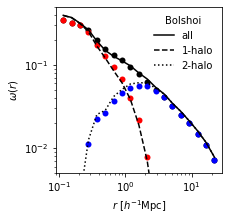

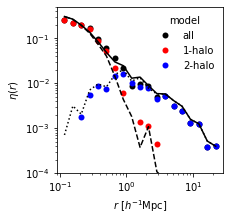

In [16]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_omega, 'o', color='black', mec='none')
p1, = plt.plot(rbin_centers, galaxy_omega_1h, 'o', color='red', mec='none')
p1, = plt.plot(rbin_centers, galaxy_omega_2h, 'o', color='blue', mec='none')
l1, = plt.plot(rbin_centers, halo_omega, '-', color='black')
l2, = plt.plot(rbin_centers, halo_omega_1h, '--', color='black')
l3, = plt.plot(rbin_centers, halo_omega_2h, ':', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.ylim([0.005,0.5])
plt.legend([l1,l2,l3],['all', '1-halo', '2-halo'], frameon=False, loc='upper right', fontsize=10, title='Bolshoi')
plt.show()

filename = "subhalo_ed_tpcf.pdf"
#fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

fig, ax  = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
p1, = plt.plot(rbin_centers, galaxy_eta, 'o', color='black', mec='none')
p2, = plt.plot(rbin_centers, galaxy_eta_1h, 'o', color='red', mec='none')
p3, = plt.plot(rbin_centers, galaxy_eta_2h, 'o', color='blue', mec='none')
l1, = plt.plot(rbin_centers, halo_eta, '-', color='black')
l2, = plt.plot(rbin_centers, halo_eta_1h, '--', color='black')
l3, = plt.plot(rbin_centers, halo_eta_2h, ':', color='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.0001,0.5])
plt.legend([p1,p2,p3],['all', '1-halo', '2-halo'], frameon=False, loc='upper right', fontsize=10, title='model')
plt.show()

filename = "subhalo_ee_tpcf.pdf"
#fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

## further decomposition

In [17]:
# (sub-)haloes

centrals = (halocat.halo_table['halo_upid'][halo_mask]==-1)
satellites = (halocat.halo_table['halo_upid'][halo_mask]!=-1)

host_ids = halocat.halo_table['halo_hostid']

In [18]:
# EE
halo_omega_1h_ss, halo_omega_2h_ss = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = satellites,  
                                                        mask2 = satellites,
                                                        period=halocat.Lbox, num_threads=4)

In [19]:
halo_omega_1h_cs, halo_omega_2h_cs = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = centrals,  
                                                        mask2 = satellites,
                                                        period=halocat.Lbox, num_threads=4)

In [20]:
halo_omega_1h_sc, halo_omega_2h_sc = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = satellites,  
                                                        mask2 = centrals,
                                                        period=halocat.Lbox, num_threads=4)

In [21]:
halo_omega_1h_cc, halo_omega_2h_cc = ee_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],
                                                        halo_coords[halo_mask], halo_orientations[halo_mask],
                                                        host_ids[halo_mask],rbins, 
                                                        mask1 = centrals,  
                                                        mask2 = centrals,
                                                        period=halocat.Lbox, num_threads=4)

In [22]:
## ED
halo_eta_1h_ss, halo_eta_2h_ss = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = satellites,  
                                    mask2 = satellites,
                                    period=halocat.Lbox, num_threads=4)

In [23]:
halo_eta_1h_cs, halo_eta_2h_cs = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = centrals,  
                                    mask2 = satellites,
                                    period=halocat.Lbox, num_threads=4)

In [24]:
halo_eta_1h_sc, halo_eta_2h_sc = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = satellites,  
                                    mask2 = centrals,
                                    period=halocat.Lbox, num_threads=4)

In [25]:
halo_eta_1h_cc, halo_eta_2h_cc = ed_3d_one_two_halo_decomp(halo_coords[halo_mask], halo_orientations[halo_mask],
                                    host_ids[halo_mask],
                                    halo_coords[halo_mask], host_ids[halo_mask],
                                    rbins,
                                    mask1 = centrals,  
                                    mask2 = centrals,
                                    period=halocat.Lbox, num_threads=4)

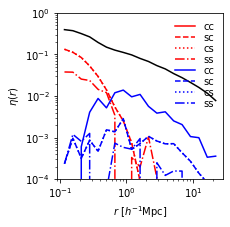

In [26]:
## plot EE results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_omega, '-', color='black')
#l2, = plt.plot(rbin_centers, halo_omega_1h, '-', color='red')
#l3, = plt.plot(rbin_centers, halo_omega_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_omega_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_omega_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_omega_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_omega_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_omega_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_omega_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_omega_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_omega_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.0001,1])
plt.legend([l4,l5,l6, l7, l8, l9, l10, l11],['cc', 'sc', 'cs', 'ss', 'cc', 'sc', 'cs', 'ss'],
           frameon=False, loc='upper right', fontsize=10, labelspacing=0.1)
plt.show()

#fig.savefig('/Users/duncan/Desktop/ee_components.pdf', dpi=250)

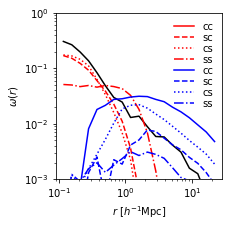

In [27]:
# plot ED results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_eta, '-', color='black')
#l2, = plt.plot(rbin_centers, halo_eta_1h, '-', color='red')
#l3, = plt.plot(rbin_centers, halo_eta_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_eta_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_eta_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_eta_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_eta_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_eta_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_eta_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_eta_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_eta_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.ylim([0.001,1])
plt.legend([l4,l5,l6, l7, l8, l9, l10, l11],['cc', 'sc', 'cs', 'ss', 'cc', 'sc', 'cs', 'ss'],
           frameon=False, loc='upper right', fontsize=10, labelspacing=0.1)
plt.show()

#fig.savefig('/Users/duncan/Desktop/ed_components.pdf', dpi=250)

In [28]:
# galaxies

host_ids = table['halo_hostid']
satellites = table['gal_type'][gal_mask]=='satellites'
centrals = table['gal_type'][gal_mask]=='centrals'

In [29]:
# EE
galaxy_omega_1h_cc, galaxy_omega_2h_cc = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = centrals, mask2 = centrals,
                                                             period=halocat.Lbox, num_threads=4)

In [30]:
galaxy_omega_1h_sc, galaxy_omega_2h_sc = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = satellites, mask2 = centrals,
                                                             period=halocat.Lbox, num_threads=4)

In [31]:
galaxy_omega_1h_cs, galaxy_omega_2h_cs = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = centrals, mask2 = satellites,
                                                             period=halocat.Lbox, num_threads=4)

In [32]:
galaxy_omega_1h_ss, galaxy_omega_2h_ss = ee_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                             host_ids[gal_mask],
                                                             rbins,
                                                             mask1 = satellites, mask2 = satellites,
                                                             period=halocat.Lbox, num_threads=4)

In [33]:
# ED
galaxy_eta_1h_cc, galaxy_eta_2h_cc  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = centrals, mask2 = centrals,
                                                          period=halocat.Lbox, num_threads=4)

In [34]:
galaxy_eta_1h_sc, galaxy_eta_2h_sc  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = satellites, mask2 = centrals,
                                                          period=halocat.Lbox, num_threads=4)

In [35]:
galaxy_eta_1h_cs, galaxy_eta_2h_cs  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = centrals, mask2 = satellites,
                                                          period=halocat.Lbox, num_threads=4)

In [36]:
galaxy_eta_1h_ss, galaxy_eta_2h_ss  = ed_3d_one_two_halo_decomp(galaxy_coords[gal_mask], galaxy_orientations[gal_mask],
                                                          host_ids[gal_mask],
                                                          galaxy_coords[gal_mask], host_ids[gal_mask],
                                                          rbins,
                                                          mask1 = satellites, mask2 = satellites,
                                                          period=halocat.Lbox, num_threads=4)

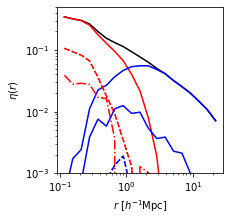

In [37]:
# plot EE results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, galaxy_omega, '-', color='black')
l2, = plt.plot(rbin_centers, galaxy_omega_1h, '-', color='red')
l3, = plt.plot(rbin_centers, galaxy_omega_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, galaxy_omega_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, galaxy_omega_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, galaxy_omega_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, galaxy_omega_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, galaxy_omega_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, galaxy_omega_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, galaxy_omega_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, galaxy_omega_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.001,0.5])
plt.show()

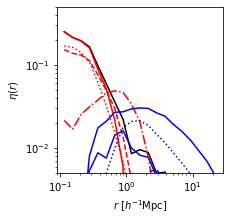

In [38]:
#plot ED results

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, galaxy_eta, '-', color='black')
l2, = plt.plot(rbin_centers, galaxy_eta_1h, '-', color='red')
l3, = plt.plot(rbin_centers, galaxy_eta_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, galaxy_eta_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, galaxy_eta_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, galaxy_eta_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, galaxy_eta_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, galaxy_eta_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, galaxy_eta_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, galaxy_eta_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, galaxy_eta_2h_ss, '-.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.005,0.5])
plt.show()

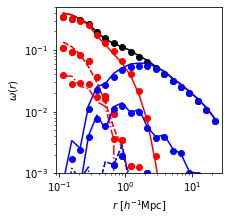

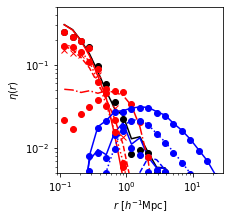

In [39]:
# all together now

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_omega, '-', color='black')
l2, = plt.plot(rbin_centers, halo_omega_1h, '-', color='red')
l3, = plt.plot(rbin_centers, halo_omega_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_omega_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_omega_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_omega_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_omega_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_omega_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_omega_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_omega_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_omega_2h_ss, '-.', color='blue')
l1, = plt.plot(rbin_centers, galaxy_omega, 'o', color='black')
l2, = plt.plot(rbin_centers, galaxy_omega_1h, 'o', color='red')
l3, = plt.plot(rbin_centers, galaxy_omega_2h, 'o', color='blue')
l4, = plt.plot(rbin_centers, galaxy_omega_1h_cc, 'o', color='red')
l5, = plt.plot(rbin_centers, galaxy_omega_1h_sc, 'o', color='red')
l6, = plt.plot(rbin_centers, galaxy_omega_1h_cs, 'o', color='red')
l7, = plt.plot(rbin_centers, galaxy_omega_1h_ss, 'o', color='red')
l8, = plt.plot(rbin_centers, galaxy_omega_2h_cc, 'o', color='blue')
l9, = plt.plot(rbin_centers, galaxy_omega_2h_sc, 'o', color='blue')
l10, = plt.plot(rbin_centers, galaxy_omega_2h_cs, 'o', color='blue')
l11, = plt.plot(rbin_centers, galaxy_omega_2h_ss, 'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\omega(r)$')
plt.ylim([0.001,0.5])
plt.show()

filename = "total_decomp_ee.pdf"
#fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
l1, = plt.plot(rbin_centers, halo_eta, '-', color='black')
l2, = plt.plot(rbin_centers, halo_eta_1h, '-', color='red')
l3, = plt.plot(rbin_centers, halo_eta_2h, '-', color='blue')
l4, = plt.plot(rbin_centers, halo_eta_1h_cc, '-', color='red')
l5, = plt.plot(rbin_centers, halo_eta_1h_sc, '--', color='red')
l6, = plt.plot(rbin_centers, halo_eta_1h_cs, ':', color='red')
l7, = plt.plot(rbin_centers, halo_eta_1h_ss, '-.', color='red')
l8, = plt.plot(rbin_centers, halo_eta_2h_cc, '-', color='blue')
l9, = plt.plot(rbin_centers, halo_eta_2h_sc, '--', color='blue')
l10, = plt.plot(rbin_centers, halo_eta_2h_cs, ':', color='blue')
l11, = plt.plot(rbin_centers, halo_eta_2h_ss, '-.', color='blue')
l1, = plt.plot(rbin_centers, galaxy_eta, 'o', color='black')
l2, = plt.plot(rbin_centers, galaxy_eta_1h, 'o', color='red')
l3, = plt.plot(rbin_centers, galaxy_eta_2h, 'o', color='blue')
l4, = plt.plot(rbin_centers, galaxy_eta_1h_cc, 'o', color='red')
l5, = plt.plot(rbin_centers, galaxy_eta_1h_sc, 'x', color='red')
l6, = plt.plot(rbin_centers, galaxy_eta_1h_cs, 'o', color='red')
l7, = plt.plot(rbin_centers, galaxy_eta_1h_ss, 'o', color='red')
l8, = plt.plot(rbin_centers, galaxy_eta_2h_cc, 'o', color='blue')
l9, = plt.plot(rbin_centers, galaxy_eta_2h_sc, 'o', color='blue')
l10, = plt.plot(rbin_centers, galaxy_eta_2h_cs, 'o', color='blue')
l11, = plt.plot(rbin_centers, galaxy_eta_2h_ss, 'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.ylabel(r'$\eta(r)$')
plt.ylim([0.005,0.5])
plt.show()

filename = "total_decomp_ed.pdf"
#fig.savefig('/Users/duncan/Projects/intrinsic_alignments/halo_shape_correlations/figures/'+filename, dpi=250)

In [40]:
from halotools.mock_observables import tpcf

In [41]:
xi_sub = tpcf(halo_coords[halo_mask], rbins, period=halocat.Lbox)
xi_gal = tpcf(galaxy_coords[gal_mask], rbins, period=halocat.Lbox)

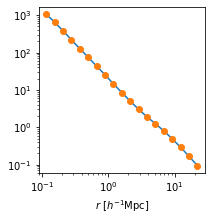

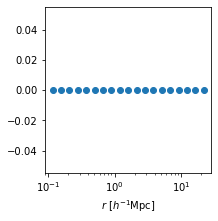

In [42]:
fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(rbin_centers,xi_sub)
plt.plot(rbin_centers,xi_gal, 'o')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.xscale('log')
plt.yscale('log')

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.2, right=0.9, bottom=0.2, top=0.9)
plt.plot(rbin_centers,(xi_gal-xi_sub)/xi_sub, 'o')
plt.xlabel(r'$r~[h^{-1}\rm Mpc]$')
plt.xscale('log')

In [ ]:
galaxy_eta

In [ ]:
table

In [ ]:
galaxy_orientations

In [ ]:
galaxy_orientations